# INTRODUCTION

Project Title: Diabetes Prediction Using Classification Model with Python
Introduction:
Diabetes is a chronic condition that affects millions of people worldwide and is characterized by elevated levels of blood glucose. Early detection and management are crucial to prevent serious health complications. Machine learning models can be used to predict the likelihood of a patient having diabetes based on various health indicators.

Aim:
The aim of this project is to develop a classification model to predict whether a patient has diabetes based on clinical features.

Objective:
To preprocess a dataset containing features such as Age, Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI.
To train a classification model using Python to accurately predict diabetes status.
To evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score.

## **WORKING ON DIABETES DATASET**

In [ ]:
# importing needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


READING AND CLEANING THE FILE


In [3]:
file = pd.read_csv('diabetes.csv')
file

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
file


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
file.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
file.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
file.Outcome

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
file.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

VISUALIZATION OF THE OUTCOME DATA

/tmp/ipykernel_6880/1292374299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome',data=file,palette=colors,edgecolor=sns.color_palette('dark',n_colors=1))


Text(0.5, 1.0, 'Count of Diabetes Outcome')

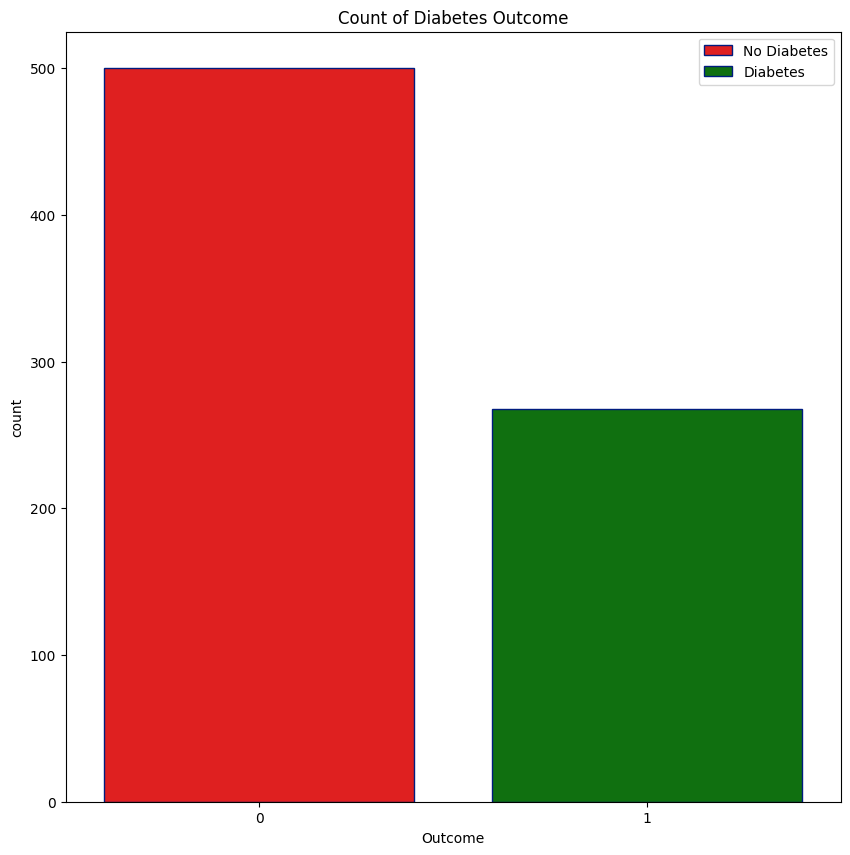

In [10]:
plt.figure(figsize=(10,10))
colors = ['red','green']
sns.countplot(x='Outcome',data=file,palette=colors,edgecolor=sns.color_palette('dark',n_colors=1))
plt.legend(['No Diabetes','Diabetes'])
plt.title('Count of Diabetes Outcome')


In [11]:
file.shape

(768, 9)

In [12]:
file.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


CORRELATION BETWEEN THE COLUMNS

In [13]:
file.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

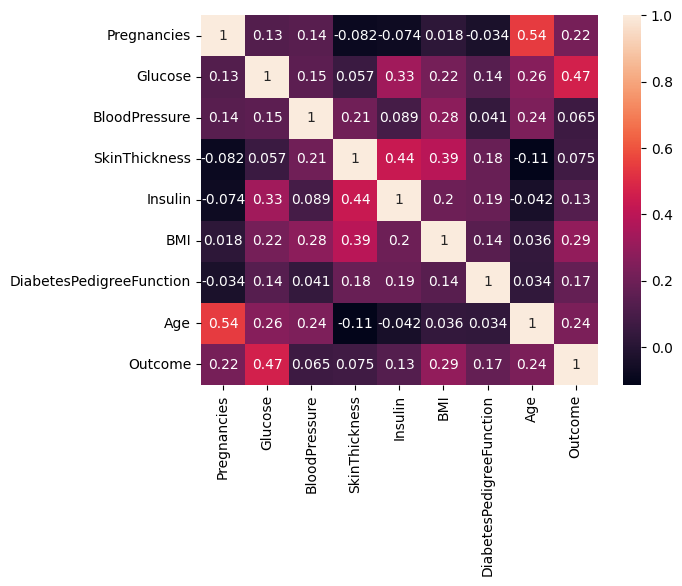

In [14]:
sns.heatmap(file.corr(), annot=True)

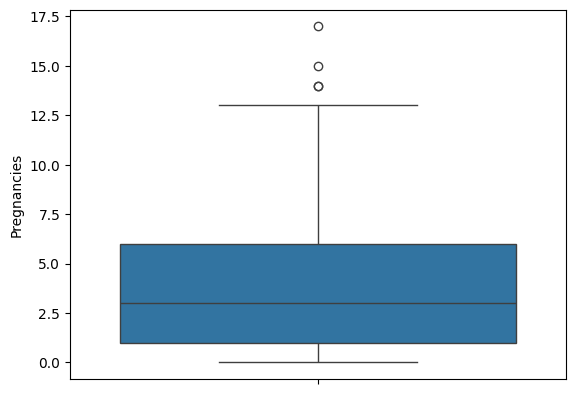

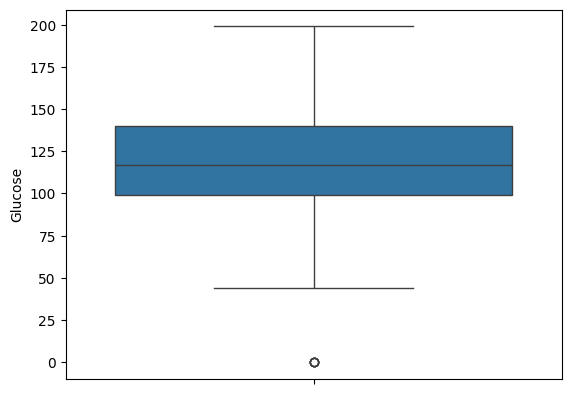

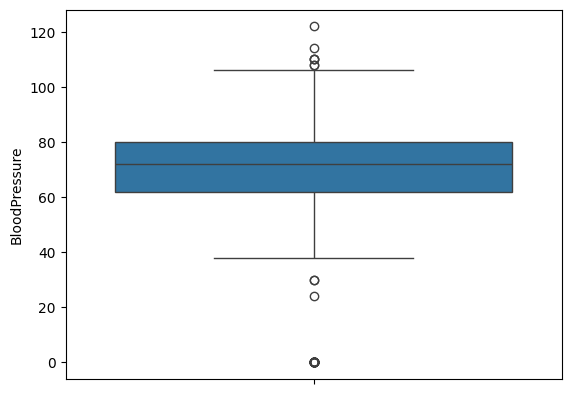

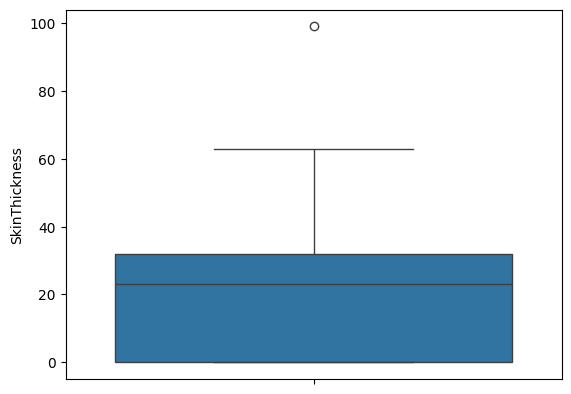

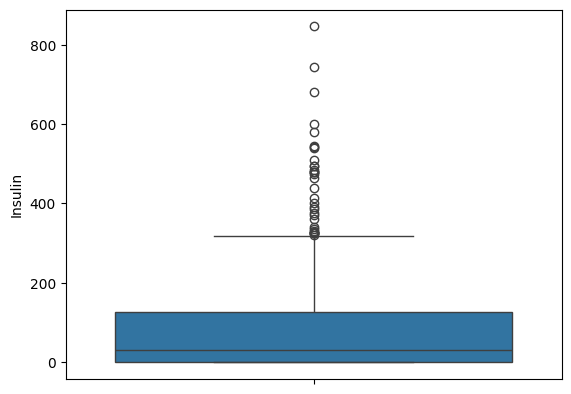

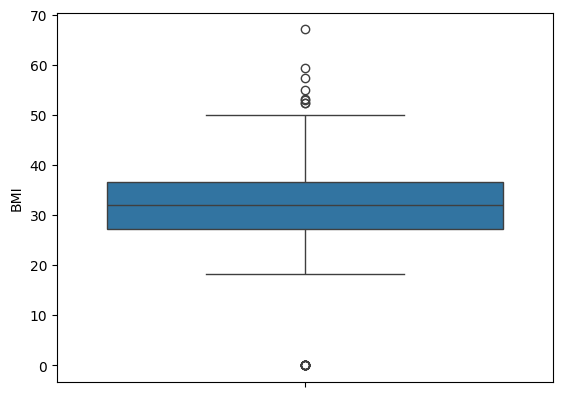

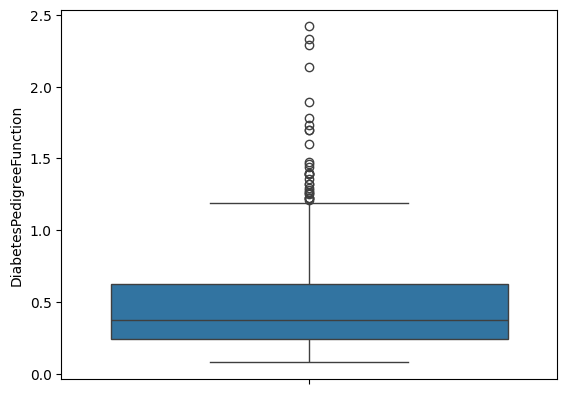

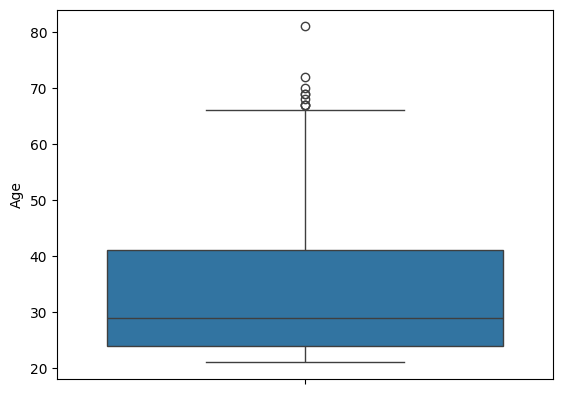

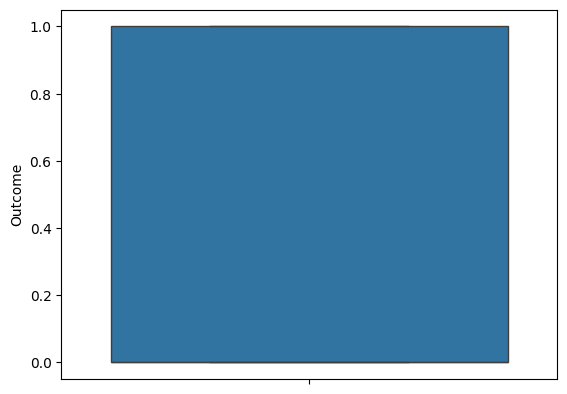

In [15]:
for x in file.columns:
    sns.boxplot(data=file, y=x)
    plt.show()

LABELING OF THE DATA

In [16]:
X = file.drop('Outcome', axis=1)
Y = file['Outcome']
display(X,Y)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

SPLITTING OF THE DATA

In [17]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=40, test_size=0.2)


In [18]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(614, 8) (154, 8) (614,) (154,)


USING LAZY PREDICT TO FIND THE BEST MODEL

In [19]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)



In [20]:
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 29/29 [00:02<00:00, 14.43it/s]

[LightGBM] [Info] Number of positive: 209, number of negative: 405
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 672
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.340391 -> initscore=-0.661553
[LightGBM] [Info] Start training from score -0.661553
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [21]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.74,0.73,0.73,0.74,0.03
LinearSVC,0.77,0.72,0.72,0.76,0.07
CalibratedClassifierCV,0.77,0.72,0.72,0.76,0.06
LogisticRegression,0.77,0.72,0.72,0.76,0.03
RandomForestClassifier,0.76,0.72,0.72,0.75,0.28
LinearDiscriminantAnalysis,0.76,0.72,0.72,0.75,0.05
RidgeClassifierCV,0.76,0.72,0.72,0.75,0.02
DecisionTreeClassifier,0.73,0.71,0.71,0.73,0.02
BaggingClassifier,0.75,0.71,0.71,0.74,0.10


[(0.0, 1.0)]

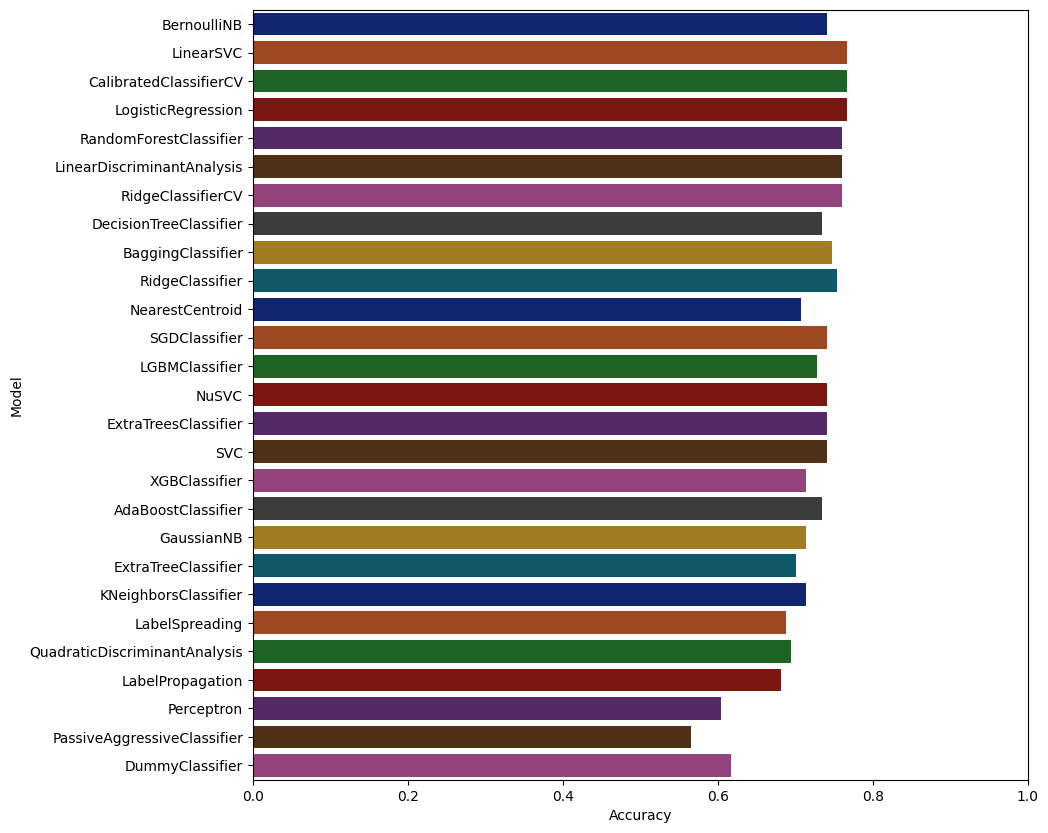

In [22]:
plt.figure(figsize=(10,10))
ax =sns.barplot(data=models, y= models.index, x='Accuracy',palette='dark')
ax.set(xlim=(0,1))


[(0.0, 1.0)]

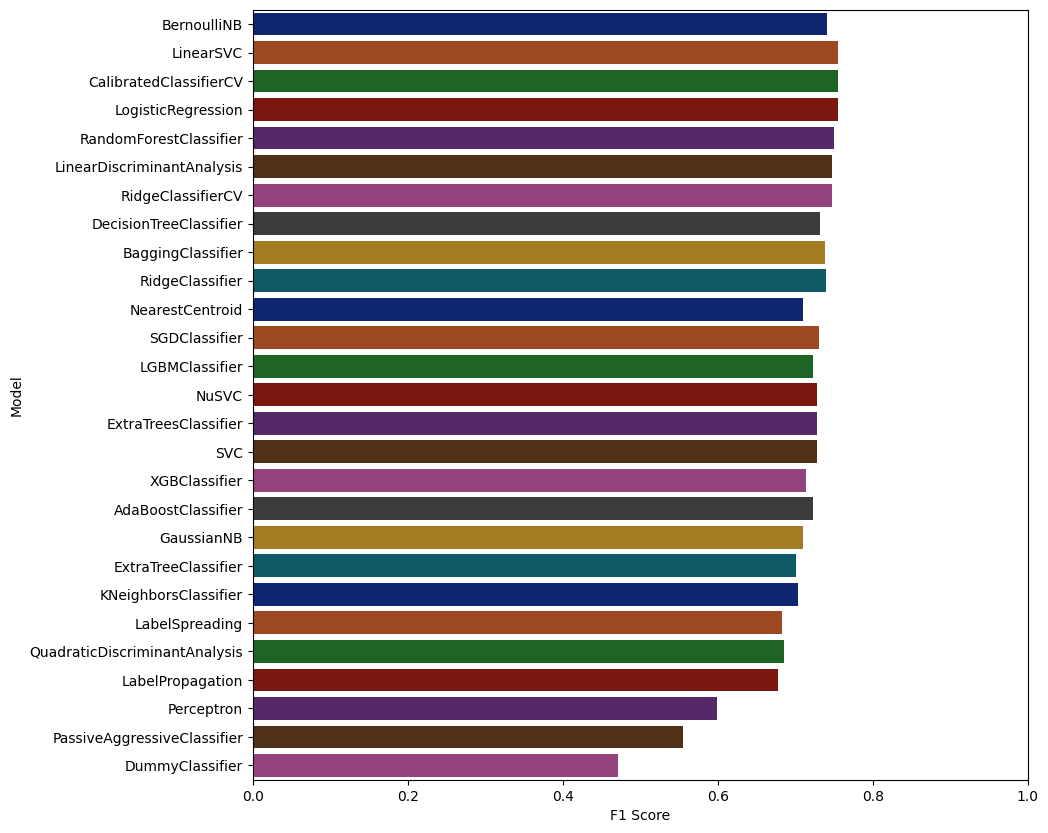

In [23]:
plt.figure(figsize=(10,10))
ax =sns.barplot(data=models, y= models.index, x='F1 Score',palette='dark')
ax.set(xlim=(0,1))

[(0.0, 1.0)]

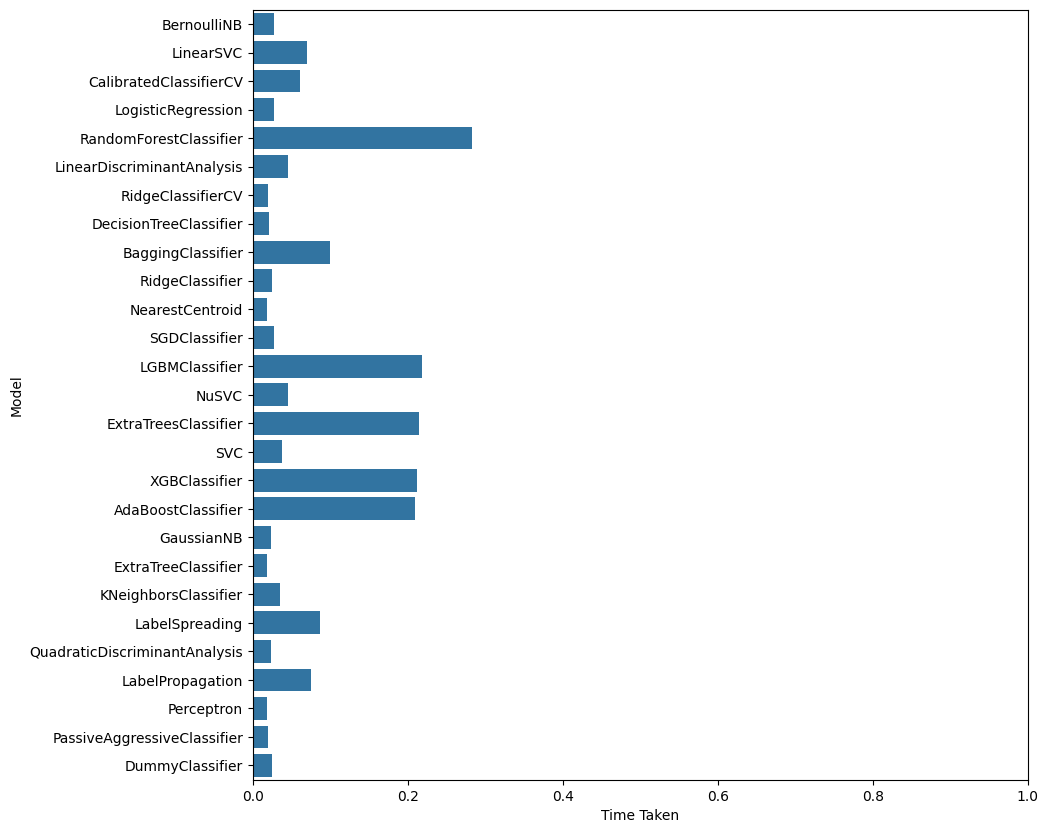

In [24]:
plt.figure(figsize=(10,10))
ax =sns.barplot(data=models, y= models.index, x='Time Taken')
ax.set(xlim=(0,1))

COMPARING DIFFERENT MODELS

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np 

name = []
scores = []
f1 = []
roc = []

np.random.seed(40)

lists = [RandomForestClassifier(), LogisticRegression(), CalibratedClassifierCV(), LinearSVC(), BernoulliNB()]


for x in lists:
    model = x.fit(X_train, Y_train)
    pred = model.predict(X_test)
    score = accuracy_score(Y_test, pred)
    f = f1_score(Y_test, pred)
    ro = roc_auc_score(Y_test, pred)
    name.append(x)
    scores.append(score)    
    f1.append(f)
    roc.append(ro)

table = pd.DataFrame({'Model Names':name, 'Accuracy':scores, 'F1 Score':f1, 'ROC AUC Score':roc})

    

In [26]:
table.sort_values(by='ROC AUC Score', ascending=False)

,Model Names,Accuracy,F1 Score,ROC AUC Score
1,LogisticRegression(),0.77,0.64,0.72
2,CalibratedClassifierCV(),0.77,0.64,0.72
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.72,0.58,0.68
3,LinearSVC(),0.64,0.10,0.53
4,BernoulliNB(),0.62,0.00,0.50


SELECTING AND EVALUATING THE THE PERFORMANCE BEST MODEL

In [42]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,confusion_matrix,roc_curve
from scipy.stats import pearsonr


model = LogisticRegression()
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
print("R-squared scores for each fold:", cv_results)
print("Mean R-squared score:", sum(cv_results)/num_folds)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
print("R-squared score on the testing set:", r2)



R-squared scores for each fold: [0.79032258 0.66129032 0.79032258 0.70967742 0.7704918  0.80327869
 0.78688525 0.81967213 0.75409836 0.7704918 ]
Mean R-squared score: 0.7656530936012692
R-squared score on the testing set: 0.7662337662337663


In [44]:
roc_auc_score(Y_test, pred)

0.7238180196253345

Text(0.5, 1.0, 'Confusion Matrix')

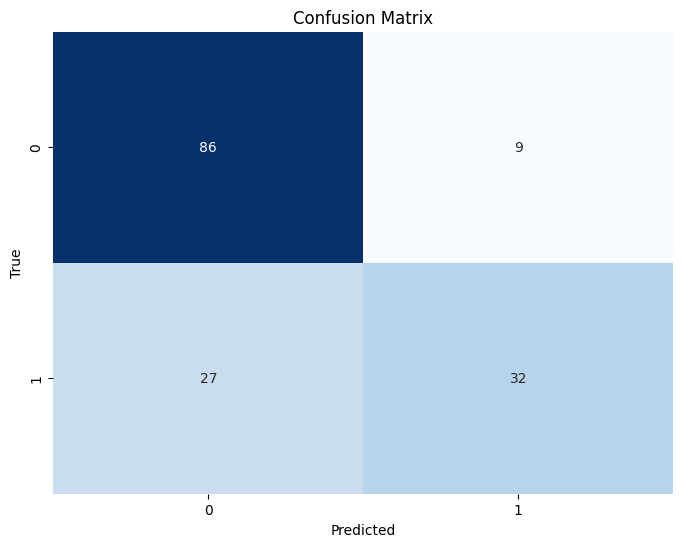

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions
y_pred = model.predict(X_test)


cm = confusion_matrix(Y_test, pred)

# Visualize confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")




In [ ]:
pickle.dump(model, open('diabeties_model.pkl','wb'))